In [745]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Fetch Data

In [746]:
project_data_path = "./data/PROJECT-QUESTIONNAIRE.csv"
project_data = pd.read_csv(project_data_path)

project_data = project_data.dropna(axis=1, how='all')

# create mapping to replace the number values

In [747]:

mapping_int_1to5 = {
    '1': 'Rarely',
    '2': 'Not often',
    '3': 'Sometimes',
    '4': 'Often',
    '5': 'Very Often'
}

mapping_float_1to5 = {
    '1.0': 'Rarely',
    '2.0': 'Not often',
    '3.0': 'Sometimes',
    '4.0': 'Often',
    '5.0': 'Very Often'
}
mapping_inverse = {'Yes':'5' , 'No': '1', 'Maybe':'3' }

mapping = {'1': 'Yes', '2': 'No', '3': 'Maybe'}








# Plot Gender Comparison Performance

In [748]:
def plot_gender_performance(topic, df, plot_type):
    """
    Plot a bar chart comparing the performance of different genders for a given topic and save the plot.

    Parameters:
    topic (str): The topic to analyze.
    df (pd.DataFrame): The DataFrame containing the data.
    plot_type (str): The type of plot to create (e.g., 'barh', 'bar').
    """
    # Group by 'Gender' and count the occurrences of each value in the topic column
    gender_performance = df.groupby('Gender')[topic].value_counts().unstack(topic)

    # Plot the bar chart
    ax = gender_performance.plot(kind=plot_type, figsize=(10, 6))

    # Set title and labels
    plt.title(topic)
    plt.xlabel('Count')
    plt.ylabel('Gender')

    # Position the legend outside the plot
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    # Adjust layout to prevent clipping of legend
    plt.tight_layout()

    # Create the 'result' directory if it doesn't exist
    if not os.path.exists('result'):
        os.makedirs('result')

    # Prepare the filename by replacing spaces with hyphens and trimming whitespace
    file_name = topic.strip().replace(' ', '-') + '.png'

    # Save the plot to the 'result' folder with the formatted filename
    plt.savefig(os.path.join('result', file_name), bbox_inches='tight')

    # Show the plot
    plt.show()

    # Clear the figure
    plt.clf()


# Gender Chart

In [749]:

def plot_bio_ratio(df, bio):
    """
    Plot a pie chart showing the total ratio of gender in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with a column.
    """
    # Count the occurrences of each gender
    bio_counts = df[bio].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(bio_counts, labels=bio_counts.index, autopct='%1.1f%%', startangle=140)

    # Set title
    plt.title(bio + ' Ratio')
    # Create the 'result' directory if it doesn't exist
    if not os.path.exists('result'):
        os.makedirs('result')

    # Save the plot to the 'result' folder
    plt.savefig(os.path.join('result', bio + '-ratio.png'))

    # Show the plot
    plt.show()




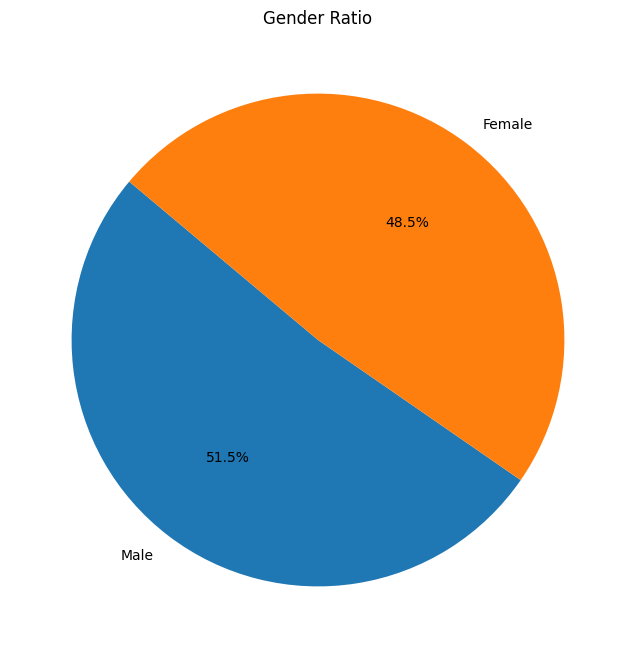

In [750]:
plot_bio_ratio(project_data, 'Gender')

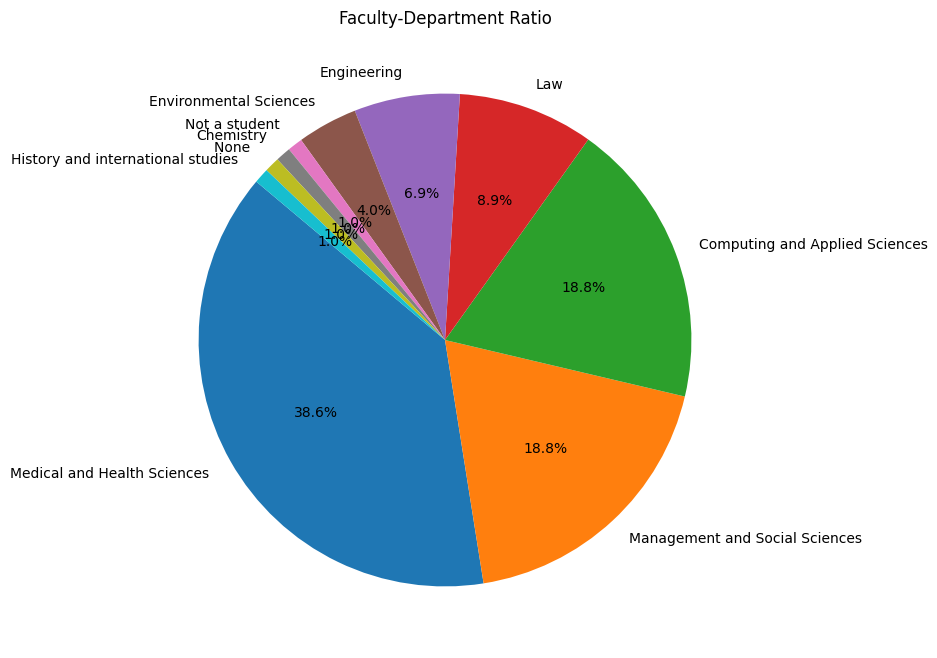

In [751]:
plot_bio_ratio(project_data, "Faculty-Department")

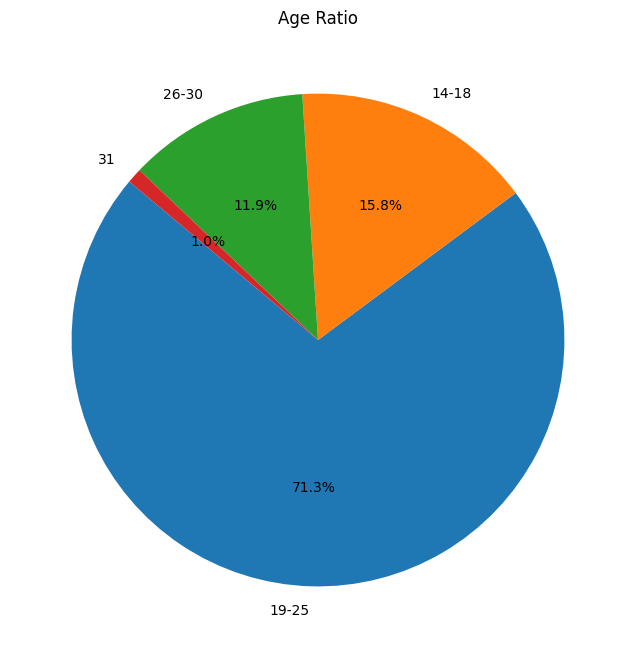

In [752]:
plot_bio_ratio(project_data, "Age")

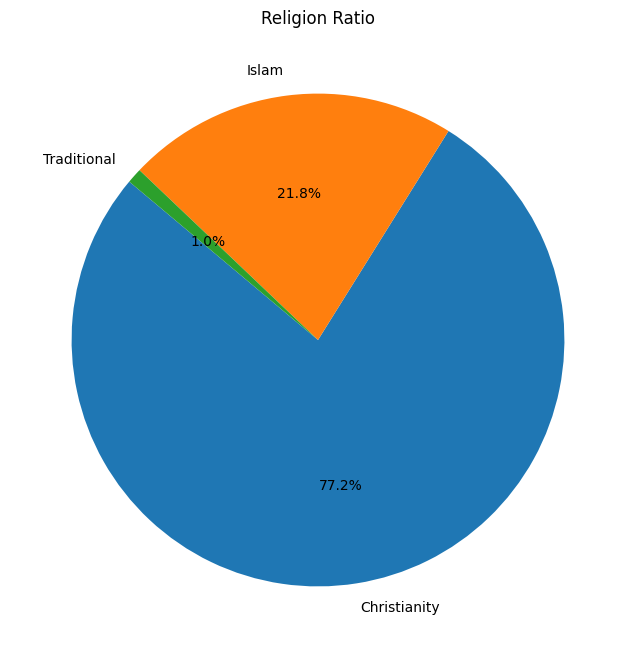

In [753]:
plot_bio_ratio(project_data, "Religion")

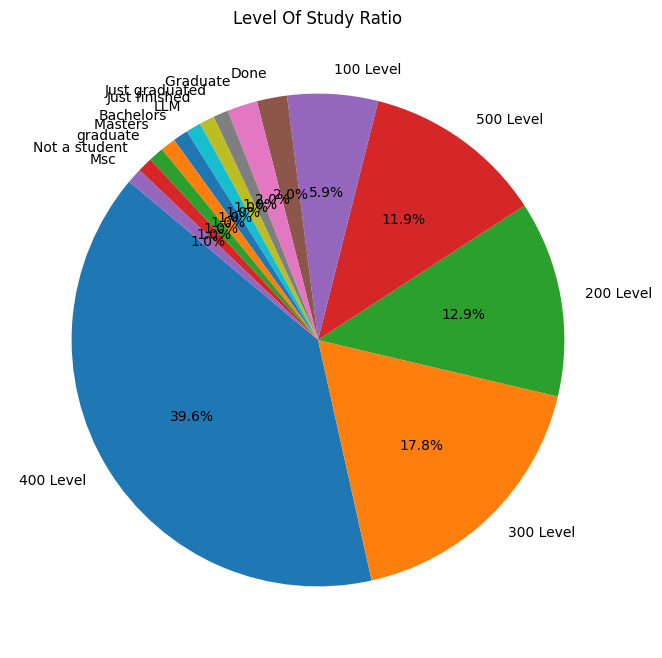

In [754]:
plot_bio_ratio(project_data, "Level Of Study")

#  My sexual pleasure is reduced by the use of  drug/substance. 

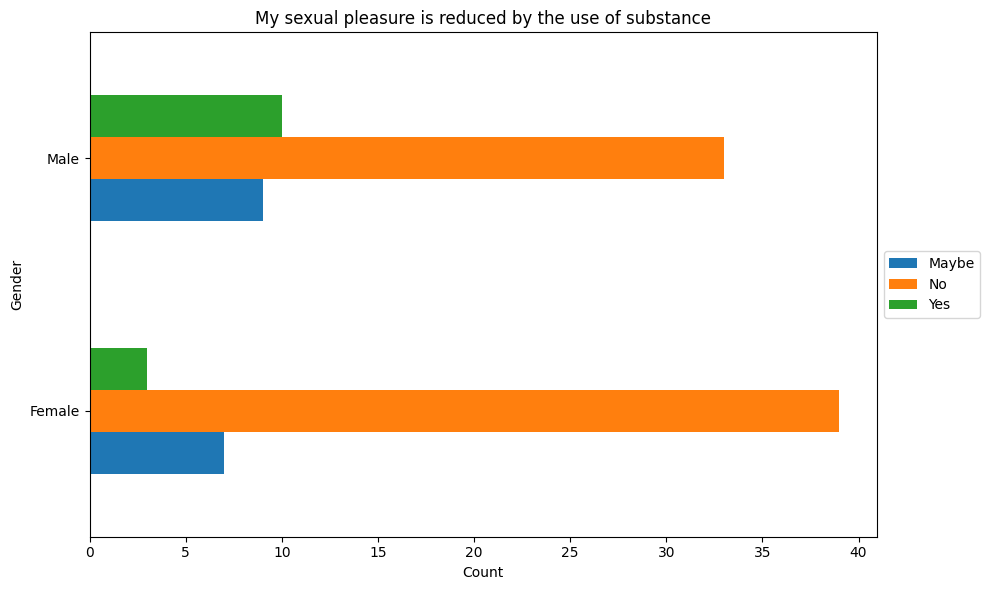

<Figure size 640x480 with 0 Axes>

In [755]:
drug_pleasure_topic = "My sexual pleasure is reduced by the use of substance"
plot_gender_performance(drug_pleasure_topic, project_data, "barh")

# My sexual performance is impaired by the use of drug

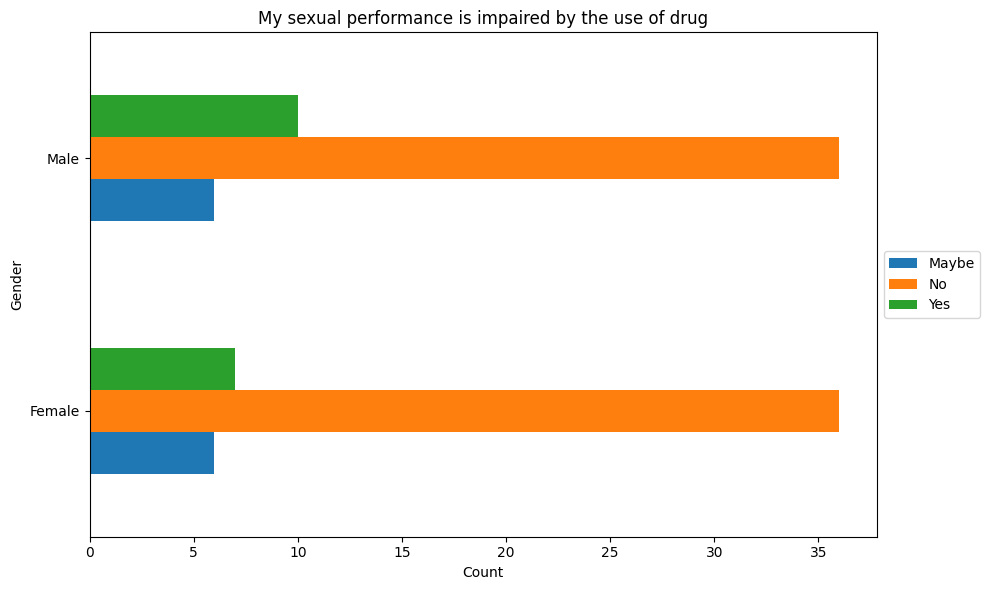

<Figure size 640x480 with 0 Axes>

In [756]:
drug_sex_performance_topic = "My sexual performance is impaired by the use of drug"
plot_gender_performance(drug_sex_performance_topic, project_data, "barh")


# My sexual drive is decreased by the use of drug/substance

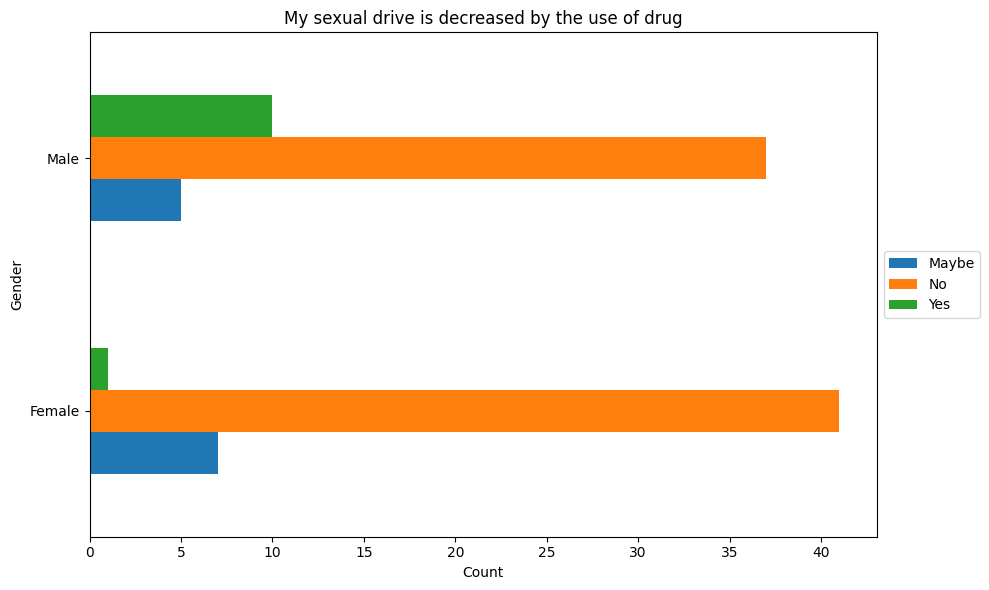

<Figure size 640x480 with 0 Axes>

In [757]:
drug_sex_drive_topic = "My sexual drive is decreased by the use of drug"
plot_gender_performance(drug_sex_drive_topic, project_data, "barh")

# Whenever I have sexual thoughts I crave for drug

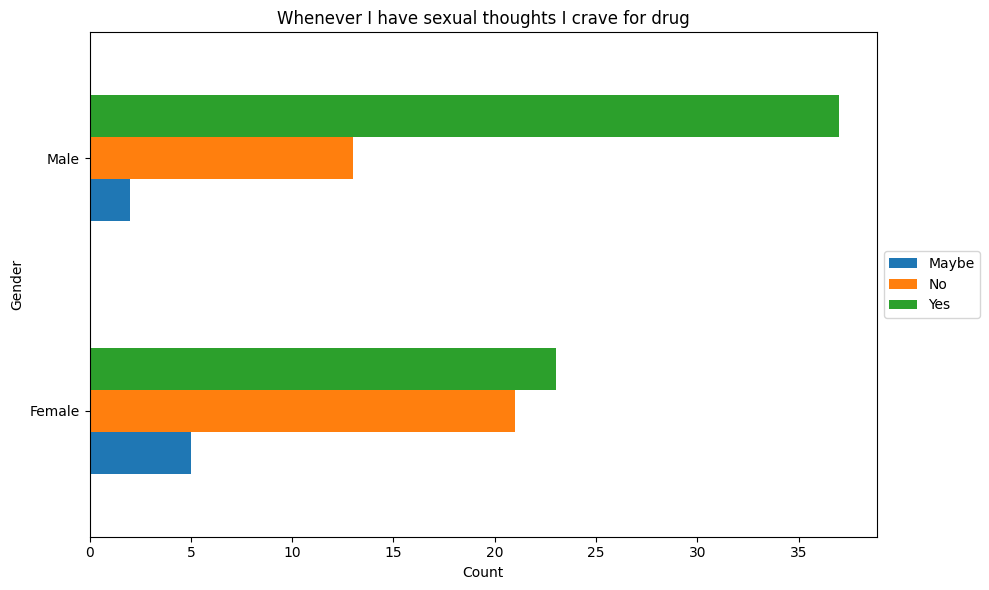

<Figure size 640x480 with 0 Axes>

In [758]:
sex_crave_drug_topic = "Whenever I have sexual thoughts I crave for drug"

# Convert the column to string type if necessary, then map the values
project_data[sex_crave_drug_topic] = project_data[sex_crave_drug_topic].astype(str)

project_data[sex_crave_drug_topic] = project_data[sex_crave_drug_topic].replace(mapping)

plot_gender_performance(sex_crave_drug_topic, project_data, "barh")

# I believe my sexual behavior linked to my primary substance abuse

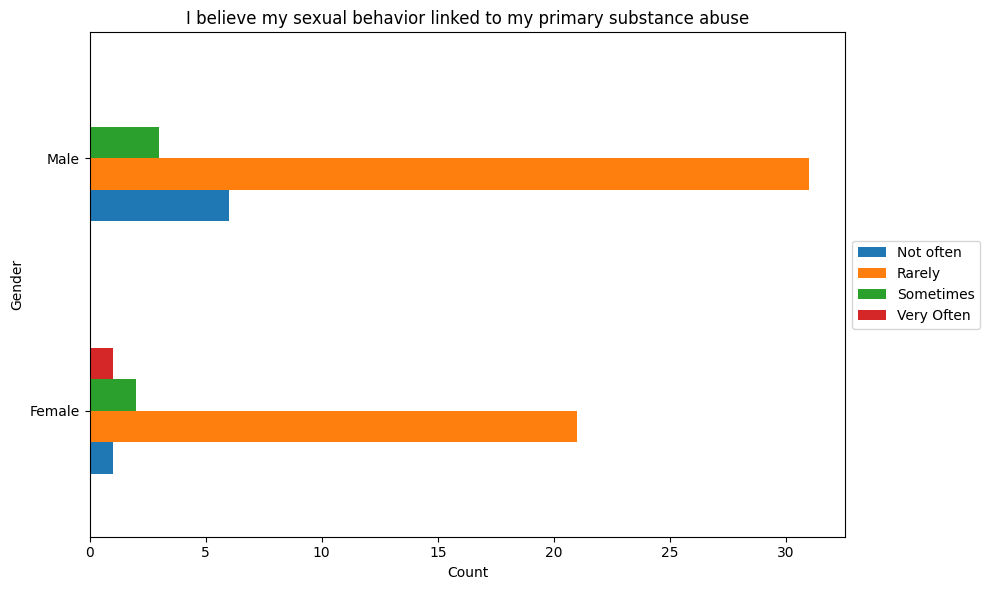

<Figure size 640x480 with 0 Axes>

In [759]:
sex_behavior_drug_topic = "I believe my sexual behavior linked to my primary substance abuse"

# Convert the column to string type if necessary, then map the values
project_data[sex_behavior_drug_topic] = project_data[sex_behavior_drug_topic].dropna(axis=0, how=["all"])
project_data[sex_behavior_drug_topic] = project_data[sex_behavior_drug_topic].astype(str)


project_data[sex_behavior_drug_topic] = project_data[sex_behavior_drug_topic].replace(mapping_float_1to5).replace('nan', np.nan)

plot_gender_performance(sex_behavior_drug_topic, project_data, "barh")

# I believe my sexual behavior is not linked to my primary substance abuse

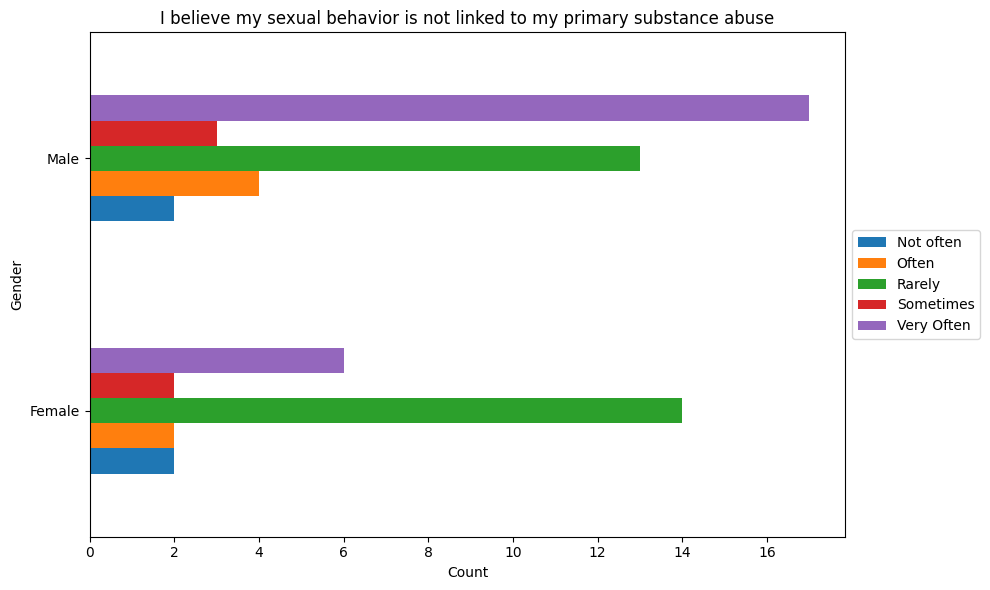

<Figure size 640x480 with 0 Axes>

In [760]:
sex_behavior_not_drug_topic = "I believe my sexual behavior is not linked to my primary substance abuse"
# Convert the column to string type if necessary, then map the values
project_data[sex_behavior_not_drug_topic] = project_data[sex_behavior_not_drug_topic].dropna(axis=0, how=["all"])
project_data[sex_behavior_not_drug_topic] = project_data[sex_behavior_not_drug_topic].astype(str)


project_data[sex_behavior_not_drug_topic] = project_data[sex_behavior_not_drug_topic].replace(mapping_float_1to5).replace('nan', np.nan)


plot_gender_performance(sex_behavior_not_drug_topic, project_data, "barh")

# I believe I do not need treatment for my sexual behavior as it is linked to my primary substance of abuse

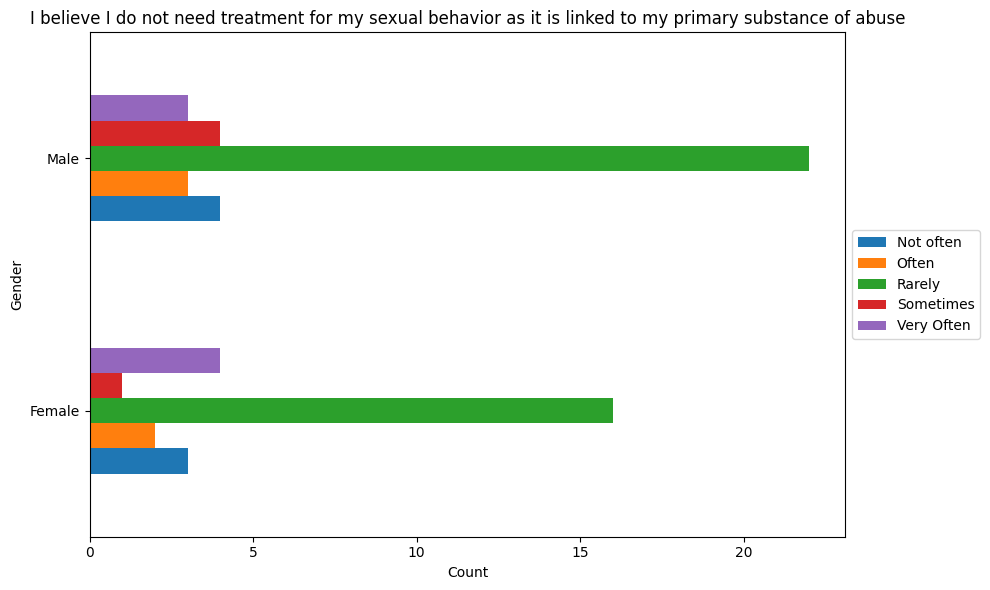

<Figure size 640x480 with 0 Axes>

In [761]:
not_need_treat = "I believe I do not need treatment for my sexual behavior as it is linked to my primary substance of abuse"

# Convert the column to string type if necessary, then map the values
project_data[not_need_treat] = project_data[not_need_treat].dropna(axis=0, how=["all"])
project_data[not_need_treat] = project_data[not_need_treat].astype(str)


project_data[not_need_treat] = project_data[not_need_treat].replace(mapping_float_1to5).replace('nan', np.nan)

plot_gender_performance(not_need_treat, project_data, "barh")

# I believe I need treatment for my sexual behavior as it is linked to my primary substance of abuse

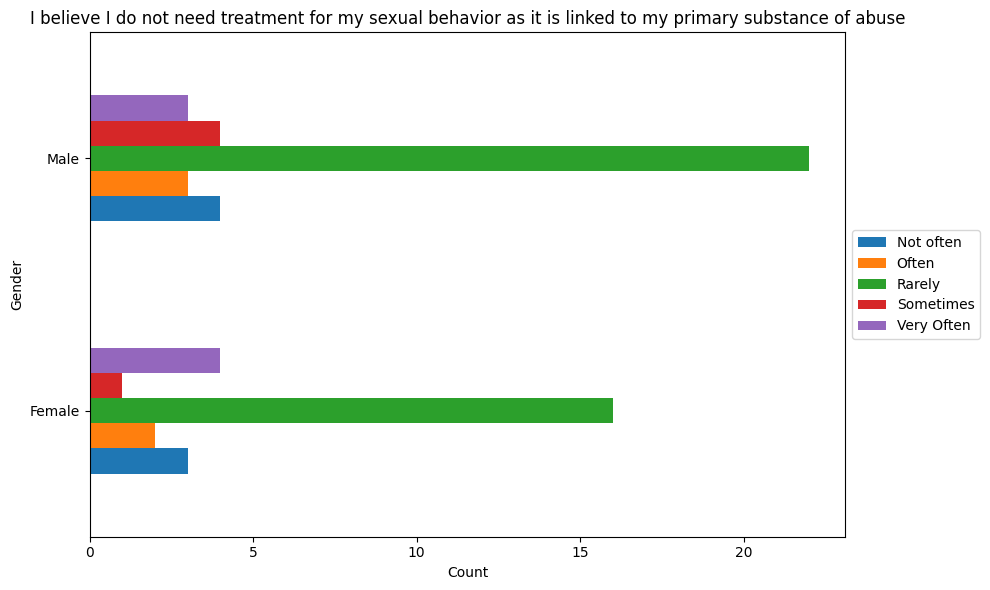

<Figure size 640x480 with 0 Axes>

In [762]:
need_treat = "I believe I need treatment for my sexual behavior as it is linked to my primary substance of abuse"

# Convert the column to string type if necessary, then map the values
project_data[not_need_treat] = project_data[not_need_treat].dropna(axis=0, how=["all"])
project_data[not_need_treat] = project_data[not_need_treat].astype(str)


project_data[not_need_treat] = project_data[not_need_treat].replace(mapping_int_1to5).replace('nan', np.nan)

plot_gender_performance(not_need_treat, project_data, "barh")

# My sexual fantasies or desires make it more difficult for me to stop using my substance of abuse

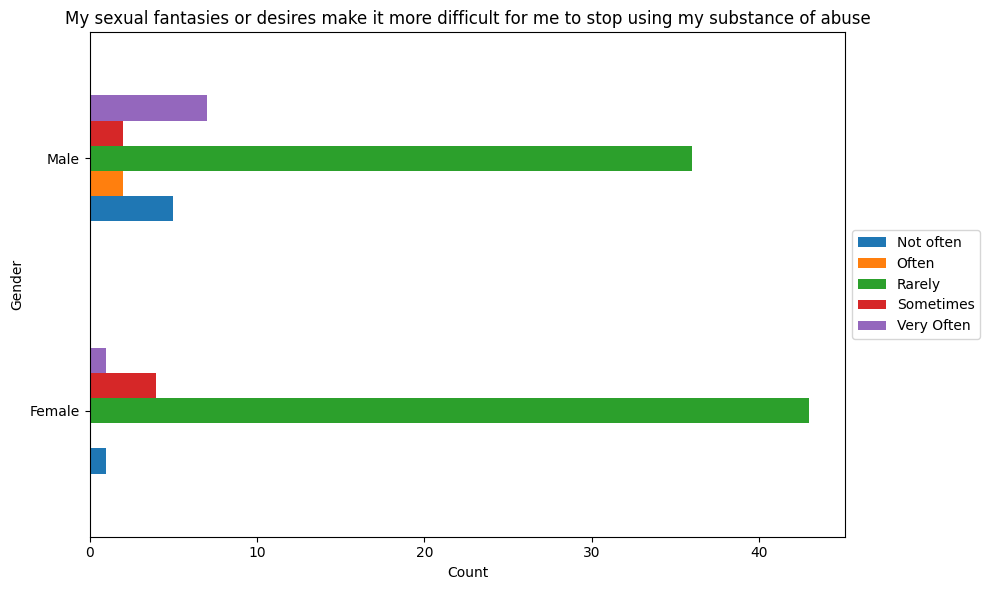

<Figure size 640x480 with 0 Axes>

In [763]:
fantasy_make = "My sexual fantasies or desires make it more difficult for me to stop using my substance of abuse"

# Convert the column to string type if necessary, then map the values
project_data[fantasy_make] = project_data[fantasy_make].dropna(axis=0, how=["all"])
project_data[fantasy_make] = project_data[fantasy_make].astype(str)


# project_data[fantasy_make] = project_data[fantasy_make]
project_data[fantasy_make] = project_data[fantasy_make].replace(mapping_inverse).replace(mapping_int_1to5)

plot_gender_performance(fantasy_make, project_data, "barh")

# I often find myself preoccupied with sexual thoughts or romantic daydreams while under the influence of my substance of abuse

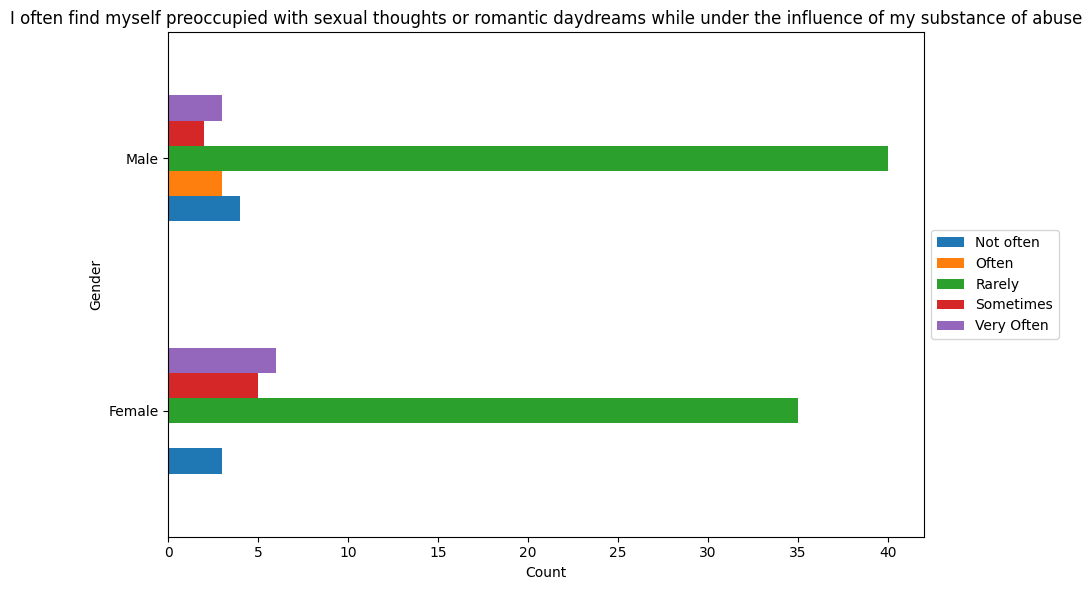

<Figure size 640x480 with 0 Axes>

In [764]:
romantic_thought = "I often find myself preoccupied with sexual thoughts or romantic daydreams while under the influence of my substance of abuse"
# Convert the column to string type if necessary, then map the values
project_data[romantic_thought] = project_data[romantic_thought].dropna(axis=0, how=["all"])
project_data[romantic_thought] = project_data[romantic_thought].astype(str)


project_data[romantic_thought] = project_data[romantic_thought].replace(mapping_inverse).replace(mapping_int_1to5)

plot_gender_performance(romantic_thought, project_data, "barh")

# My sexual performance is increased by the use of substance of abuse

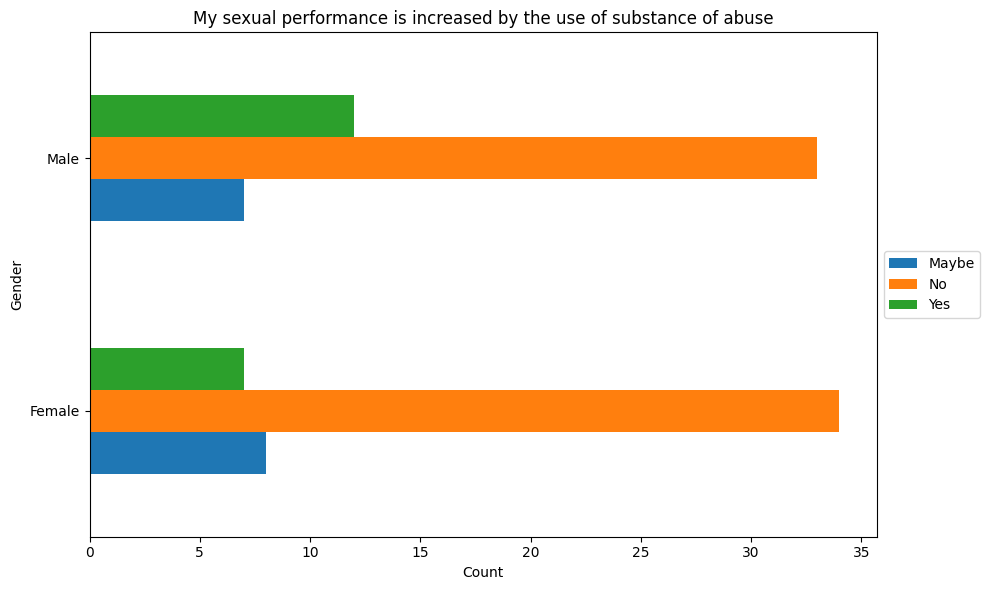

<Figure size 640x480 with 0 Axes>

In [765]:
increased_performance = "My sexual performance is increased by the use of substance of abuse"
project_data[increased_performance] = project_data[increased_performance].dropna(axis=0, how=["all"])
project_data[increased_performance] = project_data[increased_performance].astype(str)


project_data[increased_performance] = project_data[increased_performance].replace(mapping)

plot_gender_performance(increased_performance, project_data, "barh")

# My sexual pleasure is increased by the use of substance of abuse

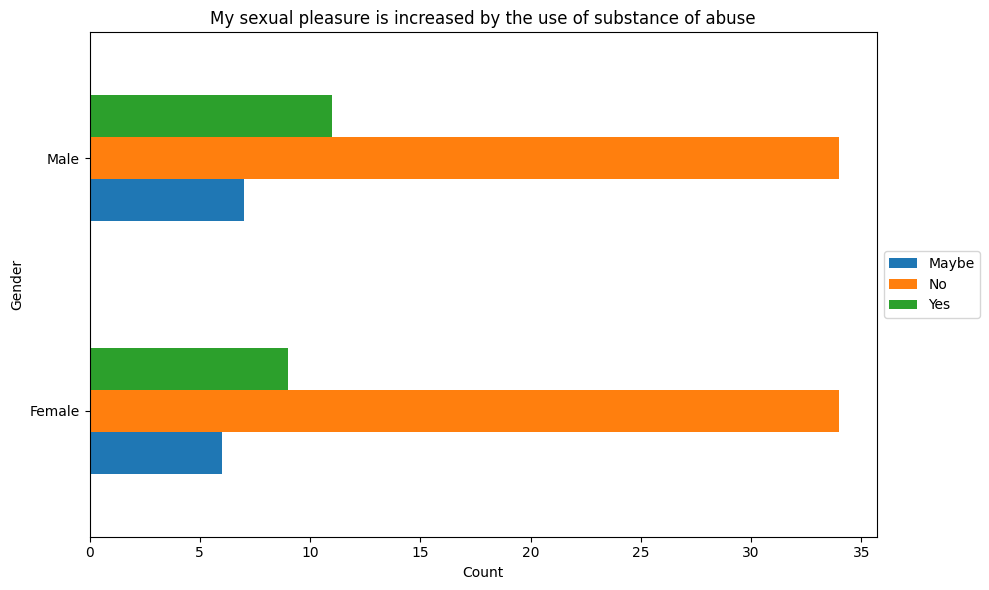

<Figure size 640x480 with 0 Axes>

In [766]:
increased_pleasure = "My sexual pleasure is increased by the use of substance of abuse"
project_data[increased_pleasure] = project_data[increased_pleasure].dropna(axis=0, how=["all"])
project_data[increased_pleasure] = project_data[increased_pleasure].astype(str)


project_data[increased_pleasure] = project_data[increased_pleasure].replace(mapping)

plot_gender_performance(increased_pleasure, project_data, "barh")

# My sexual drive is increased by the use of substance of abuse

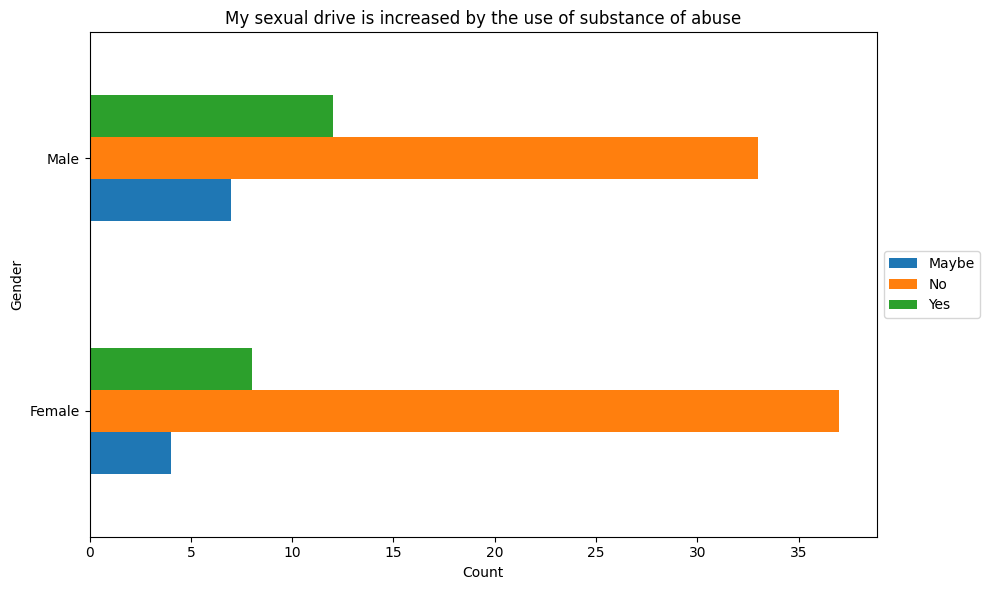

<Figure size 640x480 with 0 Axes>

In [767]:
increased_drive = "My sexual drive is increased by the use of substance of abuse"
project_data[increased_drive] = project_data[increased_drive].dropna(axis=0, how=["all"])
project_data[increased_drive] = project_data[increased_drive].astype(str)


project_data[increased_drive] = project_data[increased_drive].replace(mapping)

plot_gender_performance(increased_drive, project_data, "barh")

# The use of substance of abuse has made me become obsessed with sex and or made my sex drive abnormally high

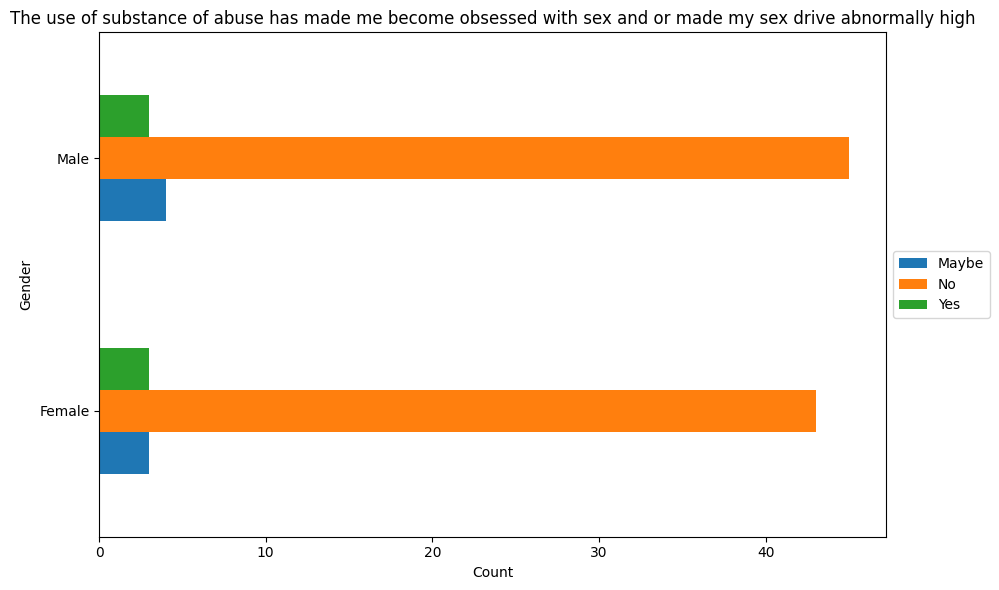

<Figure size 640x480 with 0 Axes>

In [768]:
made_obsessed = "The use of substance of abuse has made me become obsessed with sex and or made my sex drive abnormally high"
project_data[made_obsessed] = project_data[made_obsessed].dropna(axis=0, how=["all"])
project_data[made_obsessed] = project_data[made_obsessed].astype(str)


project_data[made_obsessed] = project_data[made_obsessed].replace(mapping)

plot_gender_performance(made_obsessed, project_data, "barh")

# I am more likely to have sex with a prostitute, pickup, other unknown partner, or someone other than my spouse or primary mate when using substance of abuse

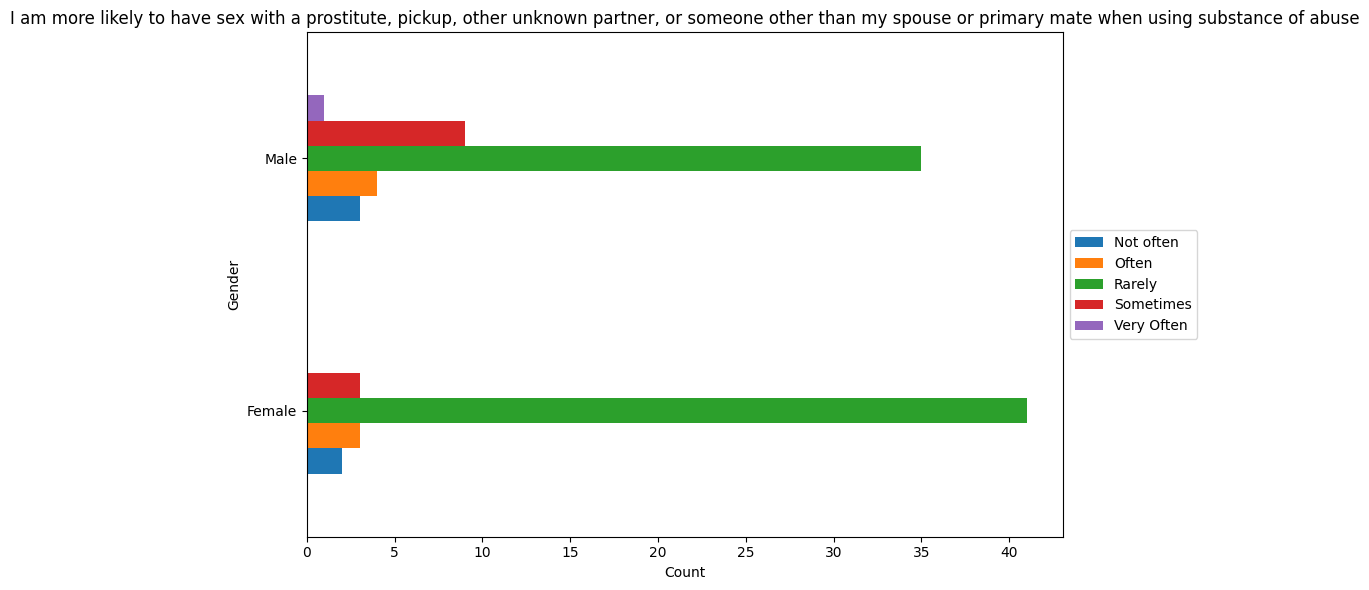

<Figure size 640x480 with 0 Axes>

In [769]:
likely_stranger = "I am more likely to have sex with a prostitute, pickup, other unknown partner, or someone other than my spouse or primary mate when using substance of abuse"
project_data[likely_stranger] = project_data[likely_stranger].dropna(axis=0, how=["all"])
project_data[likely_stranger] = project_data[likely_stranger].astype(str)


project_data[likely_stranger] = project_data[likely_stranger].replace(mapping_inverse).replace(mapping_int_1to5)

plot_gender_performance(likely_stranger, project_data, "barh")

# I am more likely to practice risky sex under the influence of drug of abuse (not use condoms, be less careful about who you choose as a sex partner, etc)

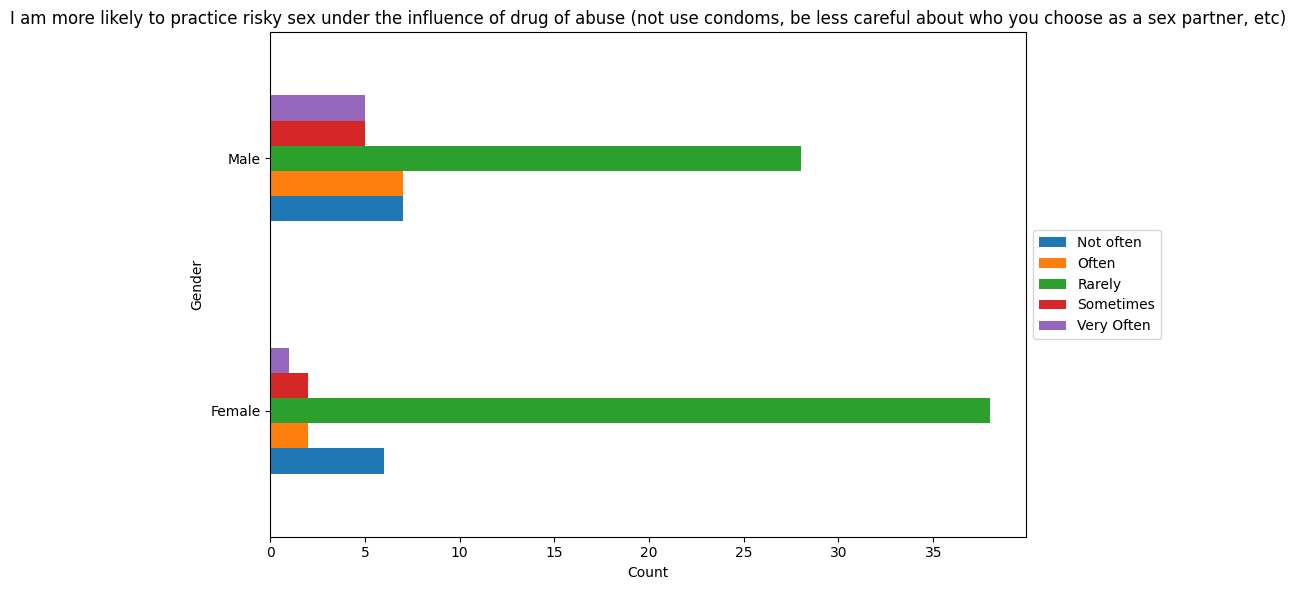

<Figure size 640x480 with 0 Axes>

In [770]:
likely_risky = "I am more likely to practice risky sex under the influence of drug of abuse (not use condoms, be less careful about who you choose as a sex partner, etc)"
project_data[likely_risky] = project_data[likely_risky].dropna(axis=0, how=["all"])
project_data[likely_risky] = project_data[likely_risky].astype(str)


project_data[likely_risky] = project_data[likely_risky].replace(mapping_inverse).replace(mapping_int_1to5)

plot_gender_performance(likely_risky, project_data, "barh")

# I have become involved in sex acts that are unusual for me when I am under the influence of any substance of abuse (marathon masturbation, go to peep shows, cross-dress, voyeurism, expose yourself)

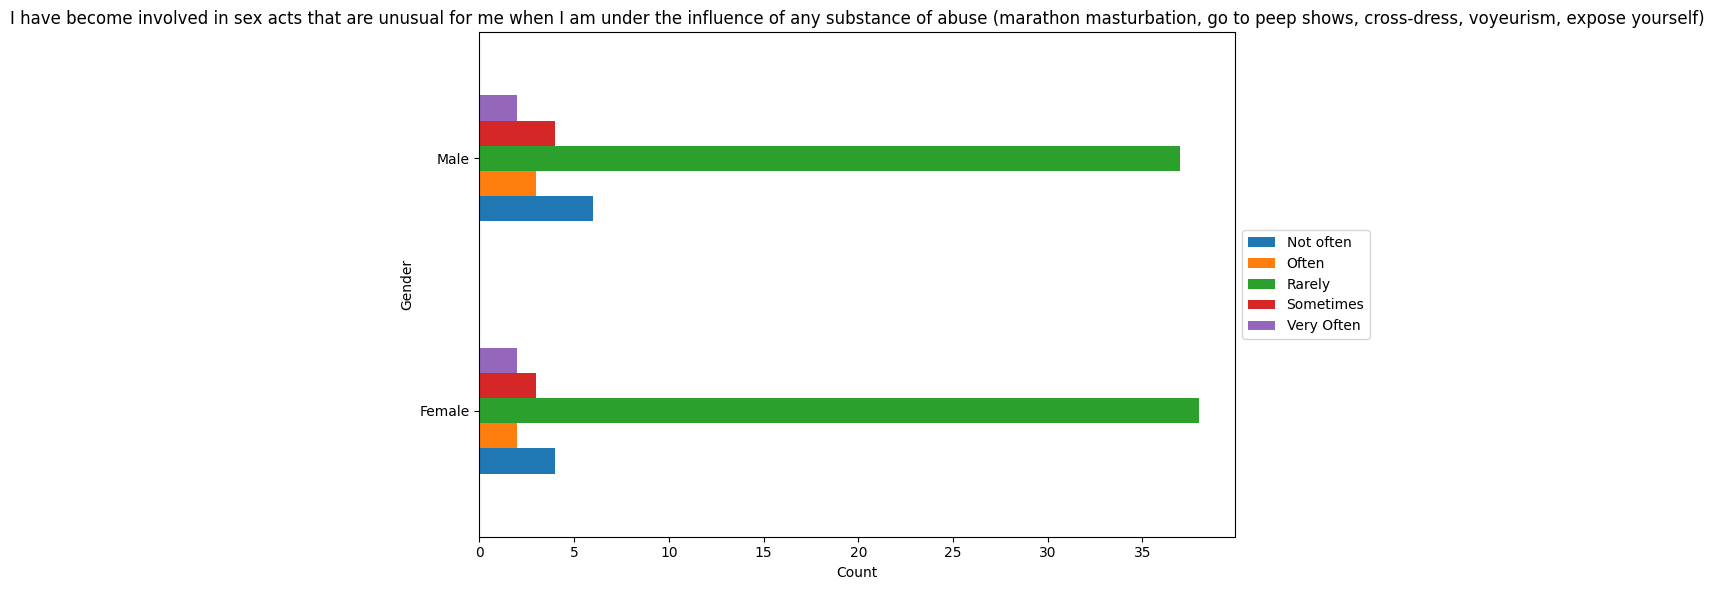

<Figure size 640x480 with 0 Axes>

In [771]:
unsual_acts = "I have become involved in sex acts that are unusual for me when I am under the influence of any substance of abuse (marathon masturbation, go to peep shows, cross-dress, voyeurism, expose yourself)"
project_data[unsual_acts] = project_data[unsual_acts].dropna(axis=0, how=["all"])
project_data[unsual_acts] = project_data[unsual_acts].astype(str)


project_data[unsual_acts] = project_data[unsual_acts].replace(mapping_inverse).replace(mapping_int_1to5)

plot_gender_performance(unsual_acts, project_data, "barh")